### 紙を折る
紙を折り続けると厚さが増していき、43回で月に届くという話があります。しかし、実際には10回も折ることができません。また、手計算も大変です。
そこで今回の課題では **1枚の紙を43回折り曲げた時の厚さを計算するプログラム** を作成します。
43回折った紙の厚さ$t_{43}$は、折る前の紙の厚さ$t_0$を使い以下の数式で求まります。
$$ t_{43} = t_{0} \times 2^{43} $$
折る前の紙の厚さ$t_0$は、**0.00008m**とします。一般点的なコピー用紙の厚さです。

In [1]:
# 問題1　べき乗の算術演算子を使用して作成
"""
紙を1回折った時の厚さを計算するコード
"""
THICKNESS = 0.00008
folded_thickness = THICKNESS * (2 ** 43)

print('厚さ: {}メートル'.format(folded_thickness))

厚さ: 703687441.77664メートル


In [2]:
# 問題2　単位の変換
# メートルをキロメートルに変換して小数点以下2桁で表示する
print('厚さ: {:.2f}キロメートル'.format(folded_thickness/1000))

厚さ: 703687.44キロメートル


In [3]:
# 問題3 for文を使用して作成
folded_thickness = 0.00008
for _ in range(43):
    folded_thickness *= 2
print('厚さ: {:.2f}キロメートル'.format(folded_thickness/1000))

厚さ: 703687.44キロメートル


In [4]:
# 問題4 計算時間の比較
import time

# べき乗での計算時間
THICKNESS = 0.00008
start = time.time()
folded_thickness = THICKNESS * (2 ** 43)
elapsed_time_exp = time.time() - start

print("time('exp'): {:.2e}[s]".format(elapsed_time_exp))


# for loopでの計算時間
folded_thickness = 0.00008
start = time.time()
for _ in range(43):
    folded_thickness *= 2
elapsed_time_forloop = time.time() - start

print("time('forloop'): {:.2e}[s]".format(elapsed_time_forloop))

time('exp'): 7.30e-05[s]
time('forloop'): 1.46e-04[s]


繰り返し回数43回では、計算速度に大きな違いはない。<p>

**繰り返し回数を増やす**

In [8]:
from decimal import Decimal

# べき乗での計算時間
THICKNESS = Decimal(0.00008)
start = time.time()
folded_thickness = THICKNESS * (2 ** 500000)
elapsed_time_exp = time.time() - start

print("time('exp'): {:.2e}[s]".format(elapsed_time_exp))


# for loopでの計算時間
folded_thickness = Decimal(0.00008)
start = time.time()
for _ in range(500000):
    folded_thickness *= 2
elapsed_time_forloop = time.time() - start

print("time('forloop'): {:.2e}[s]".format(elapsed_time_forloop))

time('exp'): 2.07e+00[s]
time('forloop'): 1.10e-01[s]


for loop を用いた方が速い。

**マジックコマンドを使う**

In [12]:
%%timeit
# べき乗での計算時間
THICKNESS = Decimal(0.00008)
folded_thickness = THICKNESS * (2 ** 500000)

2.07 s ± 88.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
# for loopでの計算時間
folded_thickness = Decimal(0.00008)
for _ in range(500000):
    folded_thickness *= 2

84 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


for loop を用いた方が速い。

In [14]:
# 問題5 リストへの保存
THICKNESS = 0.00008  # 紙の厚さ
thickness_list = []  # 0回〜43回折った時の紙の厚さを保存するリスト
for i in range(44):
    thickness_list.append(THICKNESS * 2 ** i)
print('リストの長さ: {}'.format(len(thickness_list)))

リストの長さ: 44


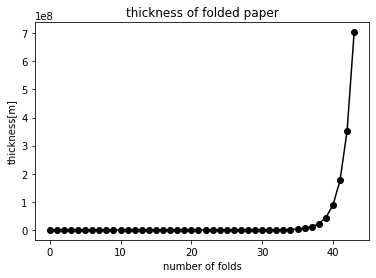

In [15]:
# 問題6 折れ線グラフの表示
"""
グラフを表示する。タイトルと軸ラベル付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('thickness of folded paper')
plt.xlabel('number of folds')
plt.ylabel('thickness[m]')
plt.plot(thickness_list, '-o', color='k')
plt.show()

1回折ることによって厚さが2倍になる。
加速度的に1回折ることによる厚みの変化が大きくなる。

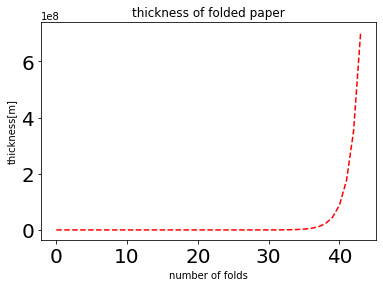

In [16]:
# 問題7　グラフのカスタマイズ
"""
赤い折れ線グラフを表示する。
軸の値を大きく表示する。
"""
plt.title('thickness of folded paper')
plt.xlabel('number of folds')
plt.ylabel('thickness[m]')
plt.tick_params(labelsize=20)
plt.plot(thickness_list, '--', color='red')
plt.show()

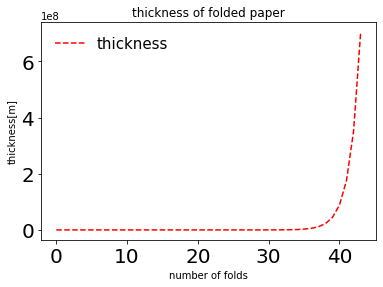

In [27]:
"""
legend を表示する
"""
plt.title('thickness of folded paper')
plt.xlabel('number of folds')
plt.ylabel('thickness[m]')
plt.tick_params(labelsize=20)
plt.plot(thickness_list, '--', color='red', label='thickness')
plt.legend(fontsize=15, frameon=False)
plt.show()

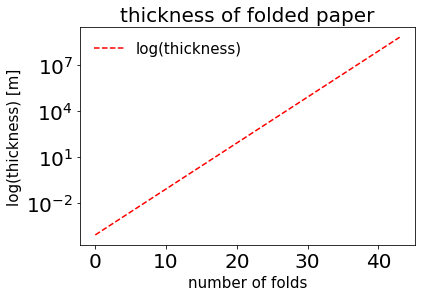

In [34]:
"""
y軸をlogスケールにする
"""
plt.title('thickness of folded paper', fontsize=20)
plt.xlabel('number of folds', fontsize=15)
plt.ylabel('log(thickness) [m]', fontsize=15)
plt.yscale('log')
plt.tick_params(labelsize=20)
plt.plot(thickness_list, '--', color='red', label='log(thickness)')
plt.legend(fontsize=15, frameon=False)
plt.show()